In [81]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [82]:
mpl.rcParams['font.family'] = 'Times New Roman'
# 設置全局字體大小
mpl.rcParams['font.size'] = 14  # 全局字體大小

資料來源 : [歷年監測資料](https://airtw.moenv.gov.tw/CHT/Query/His_Data.aspx)

| 測站 | 測站 | 測站 | 測站 | 測站 |
| :--: | :--: | :--: | :--: | :--: |
| 二林 | 大里 | 竹山 | 西屯 | 沙鹿 |
| 忠明 | 南投 | 埔里 | 彰化 | 線西 |
| 豐原

In [83]:
# | 二林 | 大里 | 竹山 | 西屯 | 沙鹿 |
# | 忠明 | 南投 | 埔里 | 彰化 | 線西 |
# | 豐原

In [84]:
Year = 2021
Region_Name = '東部'
District_Name = '關山'

#### 刪除無效值

一般測站資料註記說明：# 表示儀器檢核為無效值，* 表示程式檢核為無效值，x 表示人工檢核為無效值，A 係指因儀器疑似故障警報所產生的無效值，空白 表示缺值。

In [85]:
# Specify the name of the CSV file to open
filename = f'./{District_Name}_{Year}.csv'
# Open the CSV file
df = pd.read_csv(filename).drop(columns=['Unnamed: 27'])
df

,測站,日期,測項,00,01,02,03,04,05,06,...,14,15,16,17,18,19,20,21,22,23
0,關山,2021/01/01 00:00:00,AMB_TEMP,10.3,10.3,10.3,9.8,10.1,10.2,10,...,14.8,14.5,14.1,13.5,13.2,13,12.7,12.6,12.3,12.2
1,關山,2021/01/01 00:00:00,NO,0.9,1,1.2,0.5,1.1,0.7,1.2,...,1.5,1.5,1.4,1.4,1.4,1,1.3,1.2,1.7,1.1
2,關山,2021/01/01 00:00:00,NO2,2.7,2.2,2,2.5,2.2,2.1,3.2,...,3.9,3.8,6.3,7,6.6,5.1,4.7,5.1,6.2,1.6
3,關山,2021/01/01 00:00:00,NOx,3.7,3.3,3.2,3.1,3.4,2.9,4.4,...,5.4,5.3,7.8,8.5,8.1,6.2,6.1,6.4,8,2.8
4,關山,2021/01/01 00:00:00,O3,27.3,25.7,27.8,23.3,#,#,19.3,...,31.6,32.8,28.3,25.2,24.2,22.7,18.3,19.4,16.4,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270,關山,2021/12/31 00:00:00,SO2,1.9,0.9,0.8,0.8,1,1.1,1.1,...,0.5,0.6,0.6,0.5,0.4,0.6,0.6,0.6,0.6,0.8
5271,關山,2021/12/31 00:00:00,WD_HR,38,29,26,37,17,4,26,...,21,14,13,14,13,13,22,14,8,356
5272,關山,2021/12/31 00:00:00,WIND_DIREC,30,29,65,0,24,345,357,...,16,12,4,11,1,6,41,19,17,349
5273,關山,2021/12/31 00:00:00,WIND_SPEED,1.1,1.2,1.9,1.4,1.1,1.3,0.6,...,1.8,2,1.6,1.7,1.6,1.8,1.3,0.9,0.9,0.8


In [86]:
df.replace(['#', '*', 'x', 'A'], np.nan, inplace=True)
# Check for missing values
directory = f'./{Region_Name}空品區_{Year}/{District_Name}'
if not os.path.exists(directory):
    os.makedirs(directory)

clean_data = df.to_csv(f'./{Region_Name}空品區_{Year}/{District_Name}/RawData_{District_Name}.csv', index=False)

##### 探討數值間相關性

In [87]:
df_long = pd.melt(df, id_vars=['測站', '日期', '測項'], var_name='小時', value_name='數值')
df_long

,測站,日期,測項,小時,數值
0,關山,2021/01/01 00:00:00,AMB_TEMP,00,10.3
1,關山,2021/01/01 00:00:00,NO,00,0.9
2,關山,2021/01/01 00:00:00,NO2,00,2.7
3,關山,2021/01/01 00:00:00,NOx,00,3.7
4,關山,2021/01/01 00:00:00,O3,00,27.3
...,...,...,...,...,...
126595,關山,2021/12/31 00:00:00,SO2,23,0.8
126596,關山,2021/12/31 00:00:00,WD_HR,23,356
126597,關山,2021/12/31 00:00:00,WIND_DIREC,23,349
126598,關山,2021/12/31 00:00:00,WIND_SPEED,23,0.8


#### 進行遺漏值填補

總共偵測到的空氣微粒
<center>

| ElementCol_1 | ElementCol_2 | ElementCol_3 | ElementCol_4 | ElementCol_5 |
| :--: | :--: | :--: | :--: | :--: |
| AMB_TEMP | CH4 | CO | NMHC | NO |
| NO2 | NOx | O3 | PM10 | PM2.5 |
| RAINFALL | RH | SO2 | THC | WD_HR |
| WIND_DIREC | WIND_SPEED | WS_HR | 

</center>

In [88]:
# 將日期列設為索引，並轉換為 datetime 格式
df['日期'] = pd.to_datetime(df['日期'])
df

,測站,日期,測項,00,01,02,03,04,05,06,...,14,15,16,17,18,19,20,21,22,23
0,關山,2021-01-01,AMB_TEMP,10.3,10.3,10.3,9.8,10.1,10.2,10,...,14.8,14.5,14.1,13.5,13.2,13,12.7,12.6,12.3,12.2
1,關山,2021-01-01,NO,0.9,1,1.2,0.5,1.1,0.7,1.2,...,1.5,1.5,1.4,1.4,1.4,1,1.3,1.2,1.7,1.1
2,關山,2021-01-01,NO2,2.7,2.2,2,2.5,2.2,2.1,3.2,...,3.9,3.8,6.3,7,6.6,5.1,4.7,5.1,6.2,1.6
3,關山,2021-01-01,NOx,3.7,3.3,3.2,3.1,3.4,2.9,4.4,...,5.4,5.3,7.8,8.5,8.1,6.2,6.1,6.4,8,2.8
4,關山,2021-01-01,O3,27.3,25.7,27.8,23.3,NaN,NaN,19.3,...,31.6,32.8,28.3,25.2,24.2,22.7,18.3,19.4,16.4,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270,關山,2021-12-31,SO2,1.9,0.9,0.8,0.8,1,1.1,1.1,...,0.5,0.6,0.6,0.5,0.4,0.6,0.6,0.6,0.6,0.8
5271,關山,2021-12-31,WD_HR,38,29,26,37,17,4,26,...,21,14,13,14,13,13,22,14,8,356
5272,關山,2021-12-31,WIND_DIREC,30,29,65,0,24,345,357,...,16,12,4,11,1,6,41,19,17,349
5273,關山,2021-12-31,WIND_SPEED,1.1,1.2,1.9,1.4,1.1,1.3,0.6,...,1.8,2,1.6,1.7,1.6,1.8,1.3,0.9,0.9,0.8


In [89]:
# 將時間列轉換為列標籤
df = df.melt(id_vars=['測站','日期', '測項'], var_name='小時', value_name='數值')
df['小時'] = df['小時'].astype(int)

# 將日期和小時列合併為 datetime 格式
df['時間'] = df['日期'] + pd.to_timedelta(df['小時'], unit='h')


# 將時間列設為索引
df.set_index('時間', inplace=True)
df

,測站,日期,測項,小時,數值
時間,,,,,
2021-01-01 00:00:00,關山,2021-01-01,AMB_TEMP,0,10.3
2021-01-01 00:00:00,關山,2021-01-01,NO,0,0.9
2021-01-01 00:00:00,關山,2021-01-01,NO2,0,2.7
2021-01-01 00:00:00,關山,2021-01-01,NOx,0,3.7
2021-01-01 00:00:00,關山,2021-01-01,O3,0,27.3
...,...,...,...,...,...
2021-12-31 23:00:00,關山,2021-12-31,SO2,23,0.8
2021-12-31 23:00:00,關山,2021-12-31,WD_HR,23,356
2021-12-31 23:00:00,關山,2021-12-31,WIND_DIREC,23,349


In [90]:
def fill_short_term_missing(df):
    # 確保 '數值' 列是數字類型
    df['數值'] = pd.to_numeric(df['數值'], errors='coerce')
    
    # 使用 groupby 以測站與測項來分組，並對每一組資料進行線性插值
    df['數值'] = df.groupby(['測站', '測項'], group_keys=False)['數值'].apply(
        lambda group: group.interpolate(method='linear', limit=24, limit_direction='both'))
    
    return df

In [91]:
df = fill_short_term_missing(df)

In [92]:
df.isna().sum()

測站    0
日期    0
測項    0
小時    0
數值    0
dtype: int64

In [93]:
def fill_with_previous_next_one_day(df):
    
    # 確保 '數值' 列是數字類型
    df['數值'] = pd.to_numeric(df['數值'], errors='coerce')
    
    # 用來存儲需要補值的位置和計算後的值
    fill_values = {}

    # 逐個測站和測項進行處理
    for (station, item), group in df.groupby(['測站', '測項']):
        group = group.sort_index()
        
        # 依據日期進行分組，確定每天是否全部缺值
        daily_groups = group.groupby(group.index.date)
        
        for day, day_group in daily_groups:
            if day_group['數值'].isna().all():  # 如果整天都是缺值
                prev_day = pd.Timestamp(day) - pd.DateOffset(days=1)
                next_day = pd.Timestamp(day) + pd.DateOffset(days=1)
                
                prev_values = group.loc[prev_day.strftime('%Y-%m-%d')]['數值'] if prev_day in group.index.date else None
                next_values = group.loc[next_day.strftime('%Y-%m-%d')]['數值'] if next_day in group.index.date else None
                
                # 取前後兩天的平均值
                if prev_values is not None and next_values is not None:
                    filled_values = (prev_values + next_values) / 2
                    for idx in day_group.index:
                        fill_values[(idx, station, item)] = filled_values.mean()
    
    # 最後一次性將計算出的值補回到原 DataFrame，這裡用更精確的定位
    for (idx, station, item), value in fill_values.items():
        df.loc[(df.index == idx) & (df['測站'] == station) & (df['測項'] == item), '數值'] = value

    return df

In [94]:
df = fill_with_previous_next_one_day(df)

In [95]:
df.isna().sum()

測站    0
日期    0
測項    0
小時    0
數值    0
dtype: int64

In [96]:
# 按照 '測項' 分組，並用每個分組的平均值填補空值
df['數值'] = df.groupby('測項')['數值'].transform(lambda x: x.fillna(x.mean()))

In [97]:
df.isna().sum()

測站    0
日期    0
測項    0
小時    0
數值    0
dtype: int64

In [98]:
df.to_csv(f'./{Region_Name}空品區_{Year}/{District_Name}/Filled_data_{District_Name}_RAW.csv', index=False)

In [99]:
df.head()

,測站,日期,測項,小時,數值
時間,,,,,
2021-01-01,關山,2021-01-01,AMB_TEMP,0,10.3
2021-01-01,關山,2021-01-01,NO,0,0.9
2021-01-01,關山,2021-01-01,NO2,0,2.7
2021-01-01,關山,2021-01-01,NOx,0,3.7
2021-01-01,關山,2021-01-01,O3,0,27.3


In [100]:
# 使用 pivot 將資料按照測項分類
df = df.pivot_table(index=['測站', '時間'], columns='測項', values='數值').reset_index()

# 檢視重排後的資料
print(df.head())
df.to_csv(f'./{Region_Name}空品區_{Year}/{District_Name}/Filled_data_{District_Name}.csv', index=False)

測項  測站                  時間  AMB_TEMP  CO   NO  NO2  NOx    O3  PM10  PM2.5  \
0   關山 2021-01-01 00:00:00      10.3 NaN  0.9  2.7  3.7  27.3  18.0   15.0   
1   關山 2021-01-01 01:00:00      10.3 NaN  1.0  2.2  3.3  25.7  14.0   15.0   
2   關山 2021-01-01 02:00:00      10.3 NaN  1.2  2.0  3.2  27.8  15.0   12.0   
3   關山 2021-01-01 03:00:00       9.8 NaN  0.5  2.5  3.1  23.3  17.0   15.0   
4   關山 2021-01-01 04:00:00      10.1 NaN  1.1  2.2  3.4  30.1  20.0   13.0   

測項  RAINFALL    RH  SO2  WD_HR  WIND_DIREC  WIND_SPEED  WS_HR  
0        0.0  80.0  1.6   14.0        13.0         1.8    1.3  
1        0.0  80.0  0.6   18.0        17.0         2.2    1.4  
2        0.0  80.0  0.7   36.0        66.0         1.4    1.1  
3        0.0  85.0  0.8   52.0        37.0         0.7    0.7  
4        0.0  82.0  0.9   28.0        52.0         0.9    0.7  


In [101]:
# # 提取數值變量
# df_features = df[['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 
#                   'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR']]
# correlation_matrix = df_features.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
# plt.title('Correlation Heatmap')
# plt.show()

In [102]:
# # 提取與 PM2.5 的相關係數
# pm25_corr = correlation_matrix['PM2.5']


# # 過濾出大於 0.41 的相關係數（排除 PM2.5 自身）
# filtered_corr = pm25_corr[pm25_corr.abs() > 0.41].drop('PM2.5')
# filtered_corr = filtered_corr.sort_values(ascending=False)

# # 打印結果
# print("Variables with correlation greater than 0.41 with PM2.5:")
# for variable, corr_value in filtered_corr.items():
#     print(f"{variable}: {corr_value:.2f}")

In [103]:
df

測項,測站,時間,AMB_TEMP,CO,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,關山,2021-01-01 00:00:00,10.3,NaN,0.9,2.7,3.7,27.3,18.0,15.0,0.0,80.0,1.6,14.0,13.0,1.8,1.3
1,關山,2021-01-01 01:00:00,10.3,NaN,1.0,2.2,3.3,25.7,14.0,15.0,0.0,80.0,0.6,18.0,17.0,2.2,1.4
2,關山,2021-01-01 02:00:00,10.3,NaN,1.2,2.0,3.2,27.8,15.0,12.0,0.0,80.0,0.7,36.0,66.0,1.4,1.1
3,關山,2021-01-01 03:00:00,9.8,NaN,0.5,2.5,3.1,23.3,17.0,15.0,0.0,85.0,0.8,52.0,37.0,0.7,0.7
4,關山,2021-01-01 04:00:00,10.1,NaN,1.1,2.2,3.4,30.1,20.0,13.0,0.0,82.0,0.9,28.0,52.0,0.9,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,關山,2021-12-31 19:00:00,17.2,0.27,0.8,4.4,5.2,35.4,22.0,11.0,0.0,76.0,0.6,13.0,6.0,1.8,1.5
8756,關山,2021-12-31 20:00:00,16.9,0.25,1.0,3.9,4.9,34.2,22.0,16.0,0.0,78.0,0.6,22.0,41.0,1.3,1.3
8757,關山,2021-12-31 21:00:00,16.7,0.25,0.9,4.2,5.1,31.2,16.0,9.0,0.0,80.0,0.6,14.0,19.0,0.9,1.0
8758,關山,2021-12-31 22:00:00,16.5,0.25,0.9,3.2,4.2,26.1,19.0,10.0,0.0,81.0,0.6,8.0,17.0,0.9,0.7


In [104]:
print(f"Upper : {df['PM2.5'].mean() + 3 * df['PM2.5'].std()}")
print(f"Lower : {df['PM2.5'].mean() - 3 * df['PM2.5'].std()}")

Upper : 21.36461355535899
Lower : -8.755366980016522


#### 結果可視化

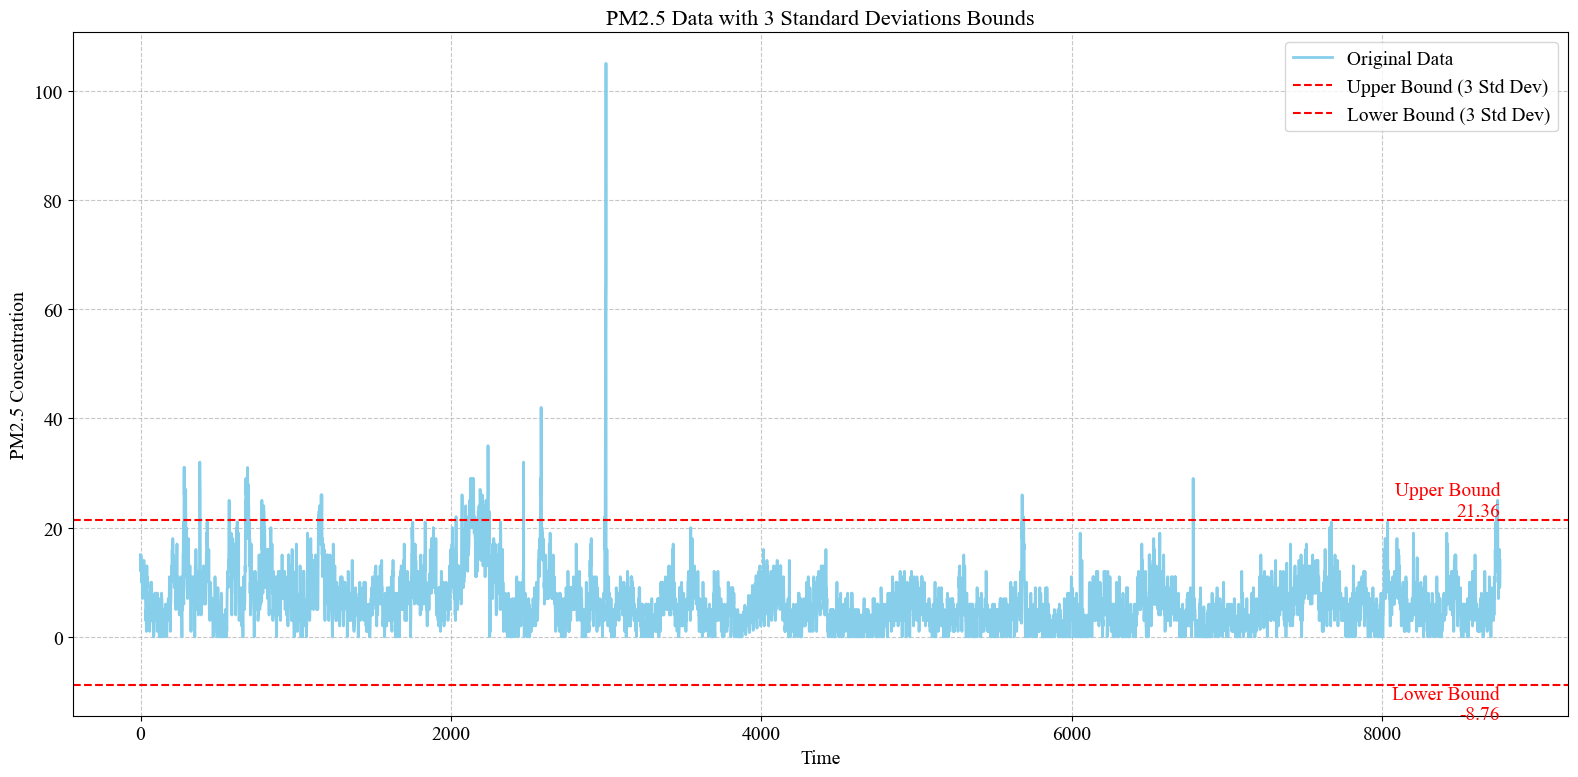

In [105]:
import matplotlib.pyplot as plt

# 原始數據的均值和標準差
mean_pm25 = df['PM2.5'].mean()
std_pm25 = df['PM2.5'].std()

# 設定閾值（以三倍標準差為例）
threshold = 3
upper_bound = mean_pm25 + threshold * std_pm25
lower_bound = mean_pm25 - threshold * std_pm25

# Plot
plt.figure(figsize=(16, 8))
plt.plot(df['PM2.5'], label='Original Data', color='skyblue', linewidth=2)
plt.axhline(y=upper_bound, color='red', linestyle='--', linewidth=1.5, label='Upper Bound (3 Std Dev)')
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1.5, label='Lower Bound (3 Std Dev)')

# Add annotations
plt.text(df.index[-1], upper_bound, f'Upper Bound\n{upper_bound:.2f}', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.text(df.index[-1], lower_bound, f'Lower Bound\n{lower_bound:.2f}', color='red', verticalalignment='top', horizontalalignment='right')

# Set title and labels
plt.title('PM2.5 Data with 3 Standard Deviations Bounds', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('PM2.5 Concentration', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

In [106]:
def fill_outliers_with_previous_next_hour(df, column_name='PM2.5'):
    
    # Ensure the target column is numeric
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    
    # Dictionary to store positions that need filling and their computed values
    fill_values = {}

    # Process each station individually
    for station, group in df.groupby('測站'):
        group = group.sort_values('時間')  # Sort by '時間' column

        # Calculate the mean and standard deviation for the target column
        mean_value = group[column_name].mean()
        std_value = group[column_name].std()

        # Set the threshold for outliers
        threshold = 3
        outliers = (group[column_name] > mean_value + threshold * std_value) | (group[column_name] < mean_value - threshold * std_value)

        # Find the indices of the outliers
        outlier_indices = group.loc[outliers].index

        for idx in outlier_indices:
            prev_hour = group.loc[idx, '時間'] - pd.Timedelta(hours=1)
            next_hour = group.loc[idx, '時間'] + pd.Timedelta(hours=1)

            prev_value = group.loc[group['時間'] == prev_hour, column_name].values
            next_value = group.loc[group['時間'] == next_hour, column_name].values

            # Calculate the average of the previous and next hours
            if len(prev_value) > 0 and len(next_value) > 0:
                fill_value = (prev_value[0] + next_value[0]) / 2
                fill_values[(idx, station)] = fill_value
    
    # Update the original DataFrame with the computed values
    for (idx, station), value in fill_values.items():
        df.loc[idx, column_name] = value

    return df

In [107]:
# Ensure '時間' column is in datetime format and set as the index
df['時間'] = pd.to_datetime(df['時間'])

In [108]:
df = fill_outliers_with_previous_next_hour(df, 'PM2.5')
# 儲存處理後的數據
df.to_csv(f'./{Region_Name}空品區_{Year}/{District_Name}/Filled_data_{District_Name}_Final.csv', index=False)

In [109]:
print(f"Upper : {df['PM2.5'].mean() + 3 * df['PM2.5'].std()}")
print(f"Lower : {df['PM2.5'].mean() - 3 * df['PM2.5'].std()}")

Upper : 20.742008990130486
Lower : -8.216095748121354


In [110]:
df

測項,測站,時間,AMB_TEMP,CO,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,關山,2021-01-01 00:00:00,10.3,NaN,0.9,2.7,3.7,27.3,18.0,15.0,0.0,80.0,1.6,14.0,13.0,1.8,1.3
1,關山,2021-01-01 01:00:00,10.3,NaN,1.0,2.2,3.3,25.7,14.0,15.0,0.0,80.0,0.6,18.0,17.0,2.2,1.4
2,關山,2021-01-01 02:00:00,10.3,NaN,1.2,2.0,3.2,27.8,15.0,12.0,0.0,80.0,0.7,36.0,66.0,1.4,1.1
3,關山,2021-01-01 03:00:00,9.8,NaN,0.5,2.5,3.1,23.3,17.0,15.0,0.0,85.0,0.8,52.0,37.0,0.7,0.7
4,關山,2021-01-01 04:00:00,10.1,NaN,1.1,2.2,3.4,30.1,20.0,13.0,0.0,82.0,0.9,28.0,52.0,0.9,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,關山,2021-12-31 19:00:00,17.2,0.27,0.8,4.4,5.2,35.4,22.0,11.0,0.0,76.0,0.6,13.0,6.0,1.8,1.5
8756,關山,2021-12-31 20:00:00,16.9,0.25,1.0,3.9,4.9,34.2,22.0,16.0,0.0,78.0,0.6,22.0,41.0,1.3,1.3
8757,關山,2021-12-31 21:00:00,16.7,0.25,0.9,4.2,5.1,31.2,16.0,9.0,0.0,80.0,0.6,14.0,19.0,0.9,1.0
8758,關山,2021-12-31 22:00:00,16.5,0.25,0.9,3.2,4.2,26.1,19.0,10.0,0.0,81.0,0.6,8.0,17.0,0.9,0.7


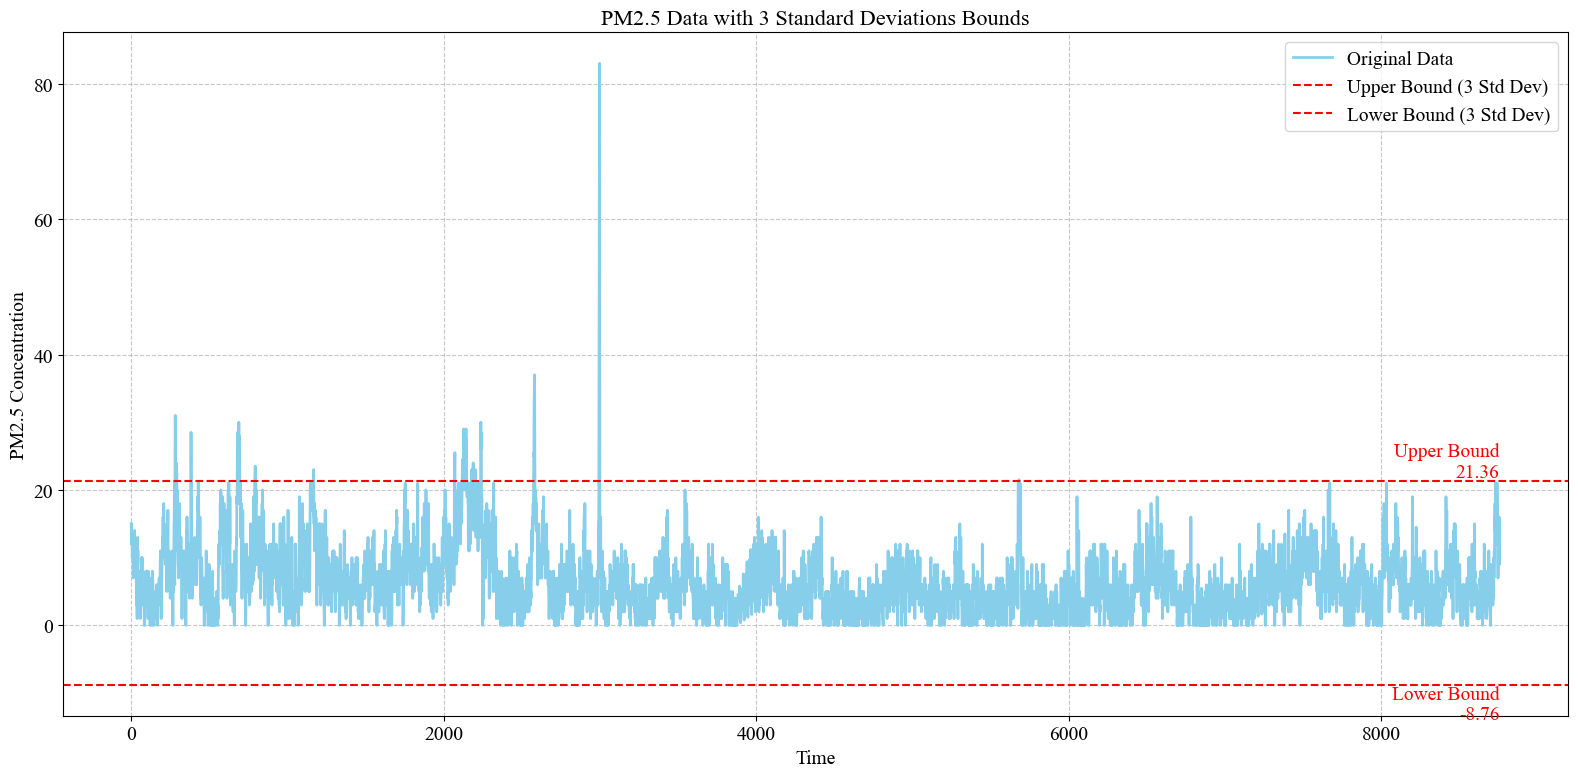

In [111]:
# Plot
plt.figure(figsize=(16, 8))
plt.plot(df['PM2.5'], label='Original Data', color='skyblue', linewidth=2)
plt.axhline(y=upper_bound, color='red', linestyle='--', linewidth=1.5, label='Upper Bound (3 Std Dev)')
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1.5, label='Lower Bound (3 Std Dev)')

# Add annotations
plt.text(df.index[-1], upper_bound, f'Upper Bound\n{upper_bound:.2f}', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.text(df.index[-1], lower_bound, f'Lower Bound\n{lower_bound:.2f}', color='red', verticalalignment='top', horizontalalignment='right')

# Set title and labels
plt.title('PM2.5 Data with 3 Standard Deviations Bounds', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('PM2.5 Concentration', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()